Recreating the dataset explored in the recent publication looking at the effect of random initializations and sub-methods in well-known dimensionality reduction techniques: 
[Initialization is critical for preserving global data structure in both t-SNE and UMAP](https://www.nature.com/articles/s41587-020-00809-z)

* Module used t-SNE: [Link](https://opentsne.readthedocs.io/en/latest/)
* Module used for UMAP: [Link](https://umap-learn.readthedocs.io/en/latest/)

## Key takeaways: 

* Using either t-SNE or UMAP over another is difficult to justify. There is no evidence per se that UMAP algorithm have any advantage over t-SNE in terms of preserving global structure. 

* These algorithms should be used cautiously and with informative initialization by default 

* In all embeddings, distances between clusters of points can be completely meaningless. It is often impossible to represent complex topologies in 2 dimensions, and embeddings should be approached with the utmost care when attempting to interpret their layout.

* The only cerrtainty is the closeness of the points and their similarity 

* These methods don’t work that great if the intrinsic dimensionality of the data is higher than 2D 

* High dimensional data sets typically have lower intrinsic dimensionality $ d << D $ however $d$ may still be larger than 2 and preserving these distances faithfully might not always be possible.

* When using both UMAP or t-SNE, one must take care not to overinterpret the embedding structure or distances.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

import openTSNE, umap
print('openTSNE', openTSNE.__version__)
print('umap', umap.__version__)

openTSNE 0.6.0
umap 0.5.1


In [2]:
from openTSNE import TSNE
from umap import UMAP

## 1. Looking at 2D circle  

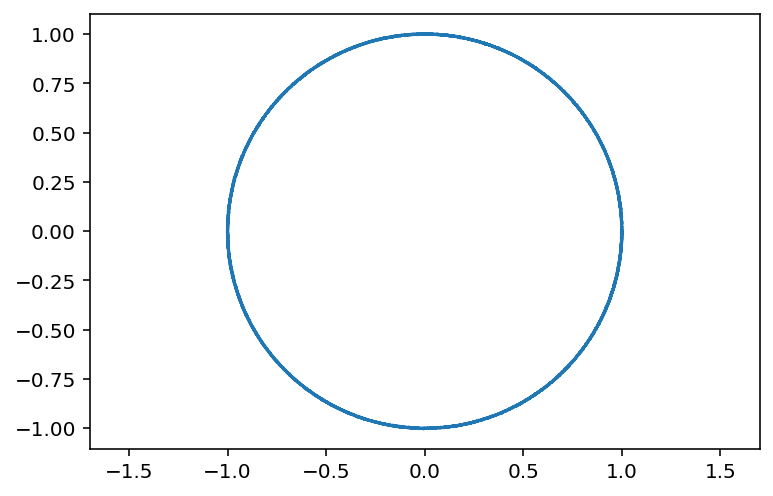

In [3]:
#Generate circle

n = 7000
np.random.seed(42)
X = np.random.randn(n, 3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

plt.plot(X[:,0], X[:,1]);
plt.axis('equal');

In [4]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 48.3 s, sys: 760 ms, total: 49.1 s
Wall time: 40.8 s


In [5]:
%%time

Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

CPU times: user 58.4 s, sys: 2.59 s, total: 1min
Wall time: 33.4 s


In [6]:
%%time
from sklearn import decomposition
pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z5 = pca_2D.transform(X)

CPU times: user 6.17 ms, sys: 5.36 ms, total: 11.5 ms
Wall time: 5.72 ms


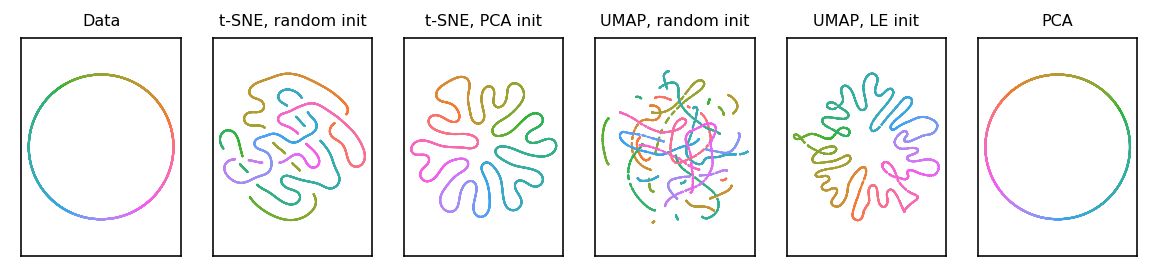

In [7]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 
          'UMAP, random init', 'UMAP, LE init', 'PCA']

plt.figure(figsize=(10,2))

for i,Z in enumerate([X,Z1,Z2,Z3,Z4,Z5],1):
    plt.subplot(1,6,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
#sns.despine(left=True, bottom=True)

## 2. Looking at hand-written digit data

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
X = digits.data
Y = digits.target

In [11]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X)
Z2 = TSNE(n_jobs=-1, negative_gradient_method='bh').fit(X)

CPU times: user 14.8 s, sys: 331 ms, total: 15.2 s
Wall time: 13.3 s


In [12]:
%%time

Z3 = UMAP(init='random', random_state=42).fit_transform(X)
Z4 = UMAP().fit_transform(X)

CPU times: user 17.7 s, sys: 311 ms, total: 18 s
Wall time: 12.5 s


In [13]:
%%time

pca_2D = decomposition.PCA(n_components=2)
pca_2D.fit(X)
Z5 = pca_2D.transform(X)

CPU times: user 17.8 ms, sys: 16.7 ms, total: 34.5 ms
Wall time: 10.2 ms


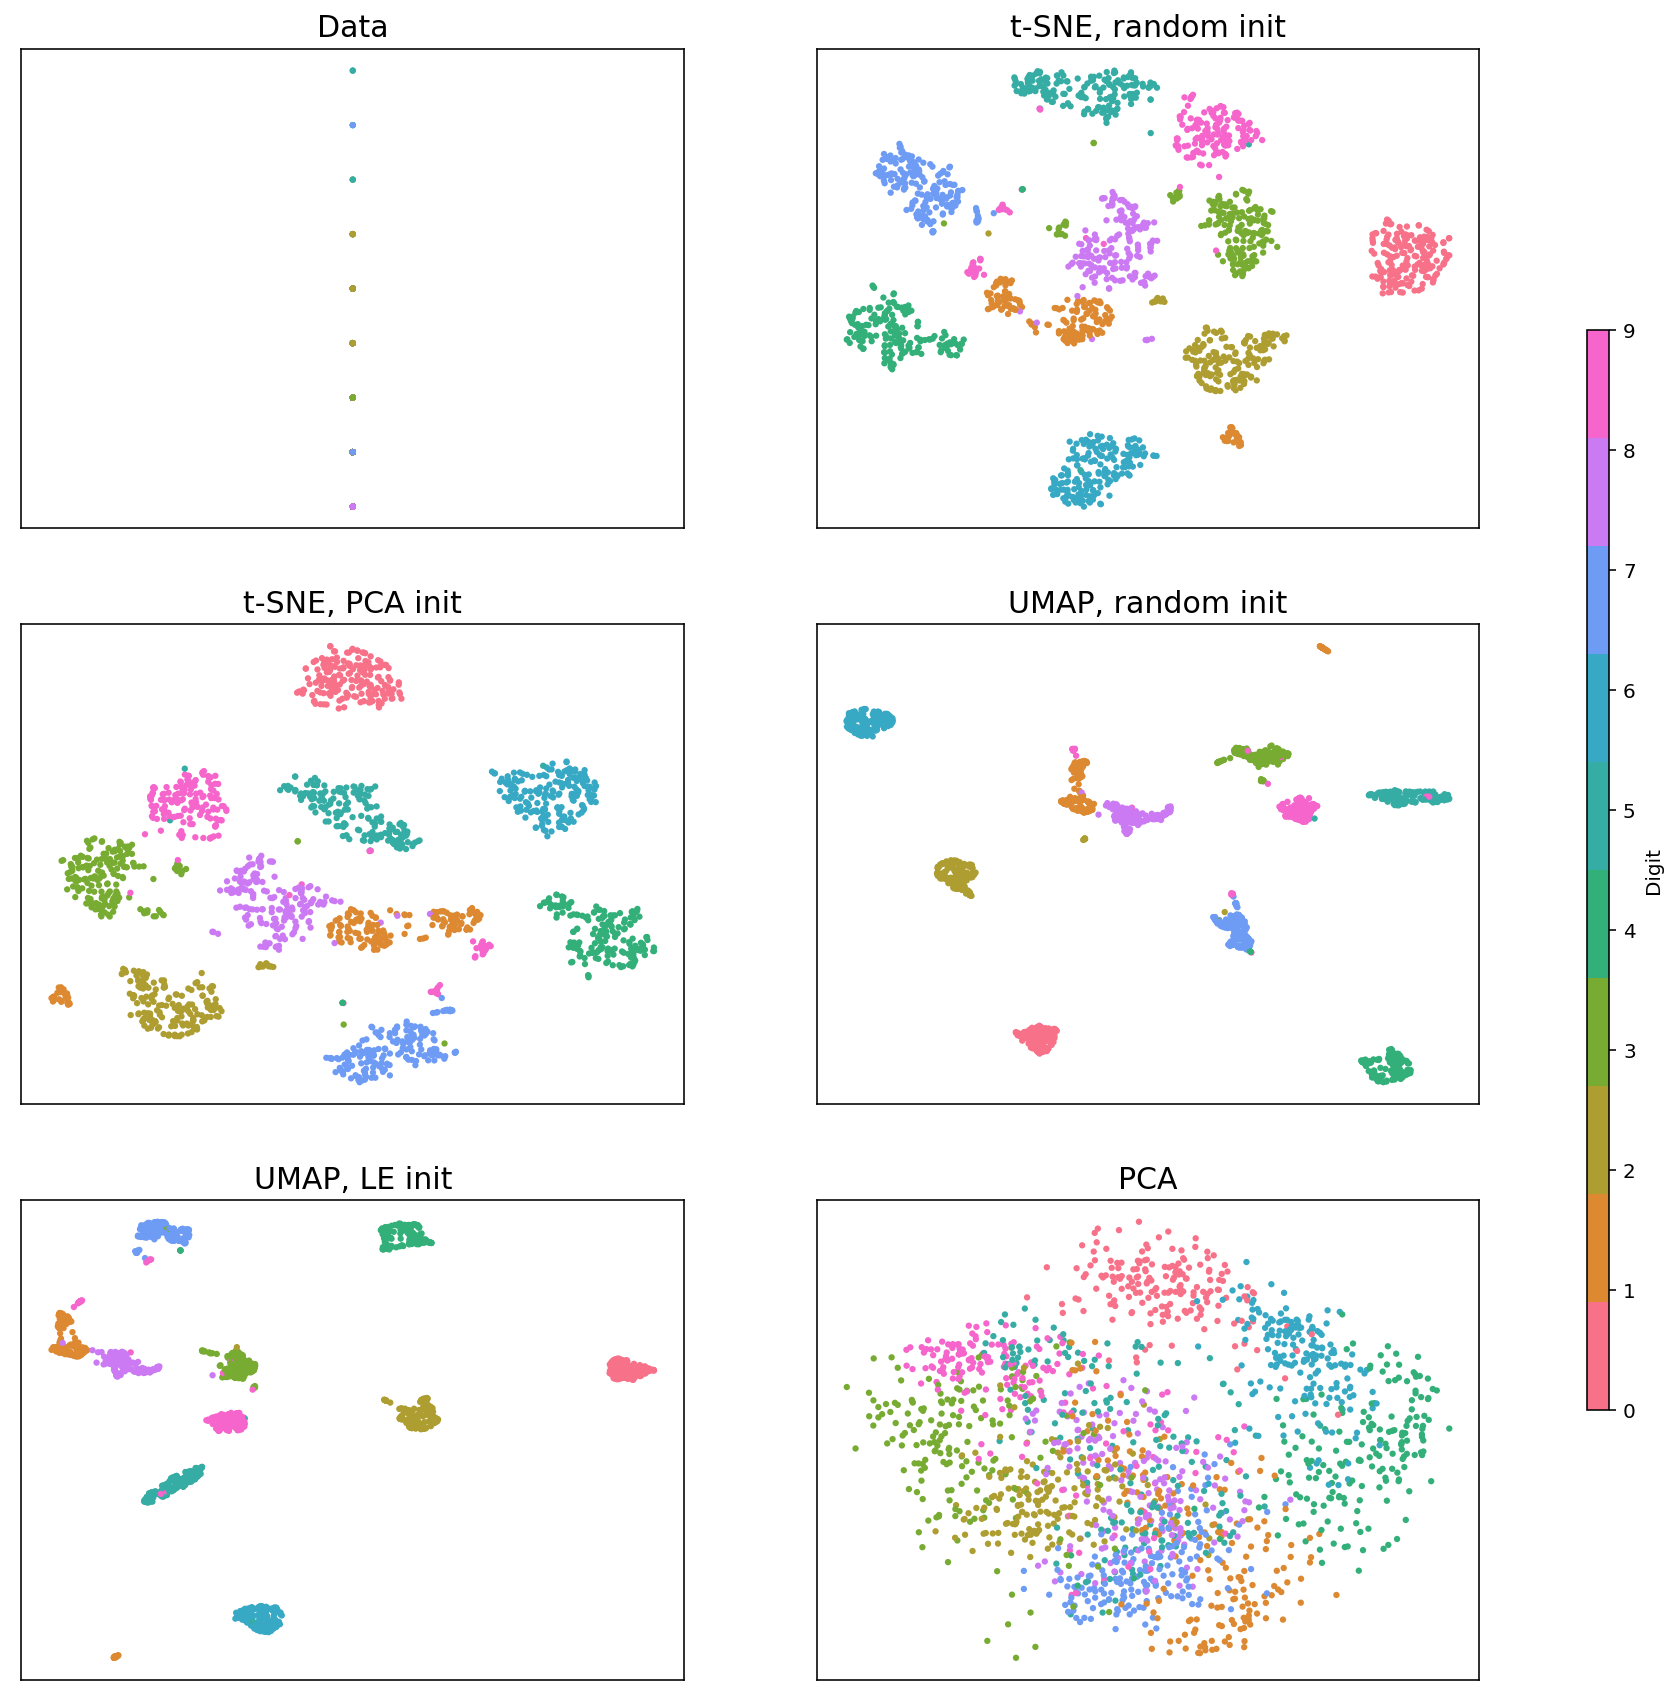

In [14]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 
          'UMAP, random init', 'UMAP, LE init', 'PCA']

fig, ax = plt.subplots(3,2, figsize=(15,15))
ax = ax.flatten()

for i,Z in enumerate([X,Z1,Z2,Z3,Z4,Z5],0):
    im = ax[i].scatter(Z[:,0], Z[:,1], s=10, c=Y, cmap=cmap, edgecolor='none')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(titles[i], fontsize=15)
    
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.25, 0.01, 0.5], label='digit')
cbar = fig.colorbar(im, cax=cbar_ax,label='Digit')